In [40]:
%matplotlib inline

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support, classification_report

# Model Training Regretion

In [42]:
mpg_data = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header=None, na_vals=['?'])

In [43]:
mpg_data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

In [44]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [45]:
mpg_data.shape

(398, 9)

In [46]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [47]:
mpg_data = mpg_data.drop(mpg_data[mpg_data.horsepower == '?'].index)

In [48]:
mpg_data.horsepower = mpg_data.horsepower.astype(np.float64)

In [49]:
mpg_data = mpg_data.drop('car_name', axis=1)

In [50]:
mpg_data_atributes = mpg_data.drop('mpg', axis=1)
mpg_data_target = mpg_data['mpg']

In [51]:
mpg_data_atributes.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [52]:
# по принцим скалера се запазва в променива. тук не го правим
mpg_data_atributes_scaled = MinMaxScaler().fit_transform(mpg_data_atributes)

In [53]:
mpg_data_atributes_scaled.min(axis=0), mpg_data_atributes_scaled.max(axis=0)

(array([0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1.]))

In [54]:
linear_regression = LinearRegression()
linear_regression.fit(mpg_data_atributes_scaled, mpg_data_target)

LinearRegression()

In [55]:
linear_regression.score(mpg_data_atributes_scaled, mpg_data_target)

0.8214780764810597

In [161]:
linear_regression.coef_

array([ -1.79818983,   6.1120602 ,  -5.16485976, -21.18236454,
         0.692132  ,   8.90503197,   3.3475977 ])

In [179]:
l2_regression = Ridge()
l2_regression.fit(mpg_data_atributes_scaled, mpg_data_target)

Ridge()

In [180]:
l2_regression.score(mpg_data_atributes_scaled, mpg_data_target)

0.8164896635931875

In [181]:
l2_regression.coef_

array([ -2.07254505,   1.34709697,  -4.22762374, -15.91870549,
        -0.3104336 ,   8.5058759 ,   2.7489514 ])

In [58]:
l1_regression = Lasso()
l1_regression.fit(mpg_data_atributes_scaled, mpg_data_target)

Lasso()

In [59]:
l1_regression.score(mpg_data_atributes_scaled, mpg_data_target)

0.4854235870676168

In [163]:
l1_regression.coef_

array([ -1.62122053,  -0.        ,  -0.        , -17.79436893,
         0.        ,   8.23697264,   2.18960206])

In [158]:
# правим настройка на ламбда/алфа в метода
l1_regression = Lasso(alpha=0.1)
l1_regression.fit(mpg_data_atributes_scaled, mpg_data_target)
l1_regression.score(mpg_data_atributes_scaled, mpg_data_target)

0.8131117430959438

In [159]:
l1_regression.coef_, l1_regression.intercept_

(array([ -1.62122053,  -0.        ,  -0.        , -17.79436893,
          0.        ,   8.23697264,   2.18960206]),
 26.396345980998465)

In [152]:
mpg_data_atributes.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [79]:
l2_regression = Ridge(alpha=0.1)
l2_regression.fit(mpg_data_atributes_scaled, mpg_data_target)
l2_regression.score(mpg_data_atributes_scaled, mpg_data_target)

0.8213402502501221

In [80]:
l2_regression.coef_, l2_regression.intercept_

(array([ -2.30602965,   6.53703497,  -3.34921982, -21.70240898,
          1.01449403,   8.93593322,   2.82664789]),
 26.188570161553237)

In [94]:
mpg_data_atributes_scaled_train, mpg_data_atributes_scaled_test, mpg_data_target_train, mpg_data_target_test = train_test_split(
    mpg_data_atributes_scaled, mpg_data_target, train_size = 0.7, random_state=42)

In [95]:
mpg_data_atributes_scaled_train.shape, mpg_data_atributes_scaled_test.shape

((274, 7), (118, 7))

In [96]:
mpg_data_target_train.shape, mpg_data_target_test.shape

((274,), (118,))

In [97]:
linear_regression = LinearRegression()
linear_regression.fit(mpg_data_atributes_scaled_train, mpg_data_target_train)

LinearRegression()

In [98]:
linear_regression.score(mpg_data_atributes_scaled_train, mpg_data_target_train)

0.8221075220232333

In [99]:
linear_regression.score(mpg_data_atributes_scaled_test, mpg_data_target_test)

0.8097361276184127

In [100]:
predicted_mpgs = linear_regression.predict(mpg_data_atributes_scaled_test)

In [101]:
predicted_mpgs

array([26.14525633, 25.96713815, 34.7155617 , 25.13068133, 28.40169444,
       30.77305225,  8.65301178, 30.92866011, 20.74737219, 29.00218058,
       12.42857286, 25.36772947, 16.65878014, 29.91839453, 21.71649745,
       29.17919993, 20.57239792, 33.50256346, 26.73975435, 29.97197491,
       19.17840878, 34.68534753, 35.58971307, 15.0241029 , 28.67138874,
       25.77002686, 21.33627692, 16.4267197 , 29.10771819, 24.40974383,
       13.45359464, 23.59828348, 20.72850068, 32.07030654, 12.39220981,
       36.30805088, 10.98702654, 24.52354427, 11.56884076,  6.88519629,
       13.02324187, 27.74972021, 34.71187903, 26.58175768, 12.0613263 ,
        9.53064139, 17.88421242, 31.47927728, 24.61281847, 30.34767116,
       11.97353713, 26.72021676, 23.28138615, 35.11560301, 28.09825927,
       17.97769314, 20.34665753, 22.81959766, 22.91994158, 26.21662196,
        8.18959689, 22.88131256, 25.59260129, 23.56359622, 30.05218768,
       28.86113322, 25.78937518, 29.5973455 , 21.75889387,  9.93

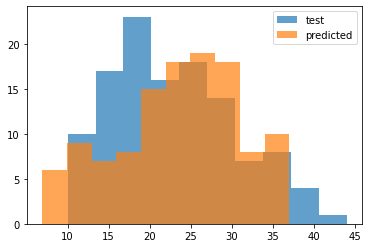

In [106]:
plt.hist(mpg_data_target_test, label='test', alpha=0.7)
plt.hist(predicted_mpgs, label='predicted', alpha=0.7)

plt.legend()
plt.show()

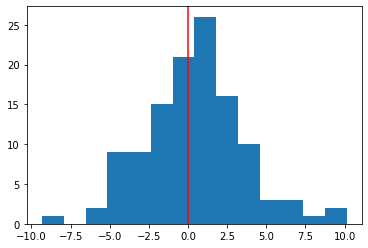

In [109]:
plt.hist(predicted_mpgs-mpg_data_target_test, bins='fd')
plt.axvline([0], color='red')
plt.show()

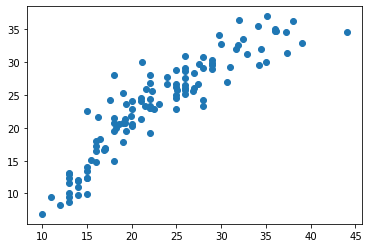

In [111]:
plt.scatter(mpg_data_target_test, predicted_mpgs)
plt.show()

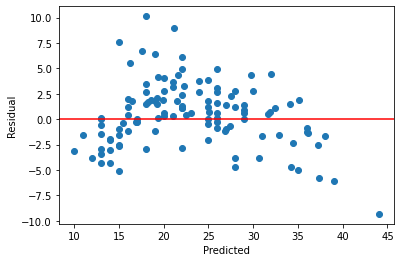

In [115]:
plt.scatter(mpg_data_target_test, predicted_mpgs-mpg_data_target_test)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline([0], c='red')
plt.show()
# за да кажем, че моделът е добър, точките трябва да са разпилени равномерно навсякъде и да са в малък интервал по у